In [63]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [64]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [65]:
train_dataset

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [66]:
test_dataset

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [67]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [68]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [69]:
train_dataset.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
test_dataset.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [71]:
# Drop unnecessary columns (if any)
train_dataset.drop(columns=['id', 'Product ID'], inplace=True)
test_dataset.drop(columns=['id', 'Product ID'], inplace=True)

In [72]:
# Convert categorical variables into numerical using one-hot encoding
train_dataset = pd.get_dummies(train_dataset, columns=['Type'], drop_first=True)
test_dataset = pd.get_dummies(test_dataset, columns=['Type'], drop_first=True)

In [73]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
train_dataset[numerical_cols] = scaler.fit_transform(train_dataset[numerical_cols])
test_dataset[numerical_cols] = scaler.transform(test_dataset[numerical_cols])

In [74]:
# Split the datasets into features and target
X_train = train_dataset.drop(columns=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y_train = train_dataset['Machine failure']
X_test = test_dataset.drop(columns=['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y_test = test_dataset[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

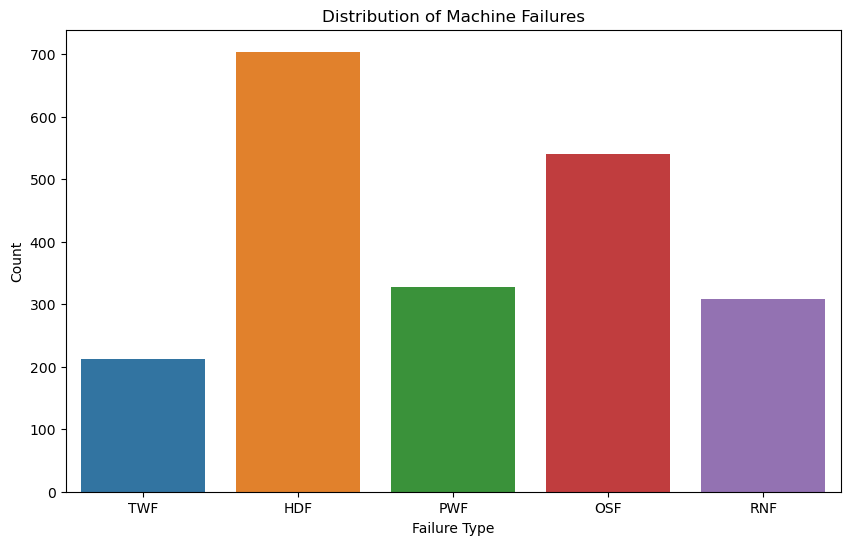

In [76]:
# Failure Distribution
failure_counts = train_dataset[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values)
plt.title('Distribution of Machine Failures')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

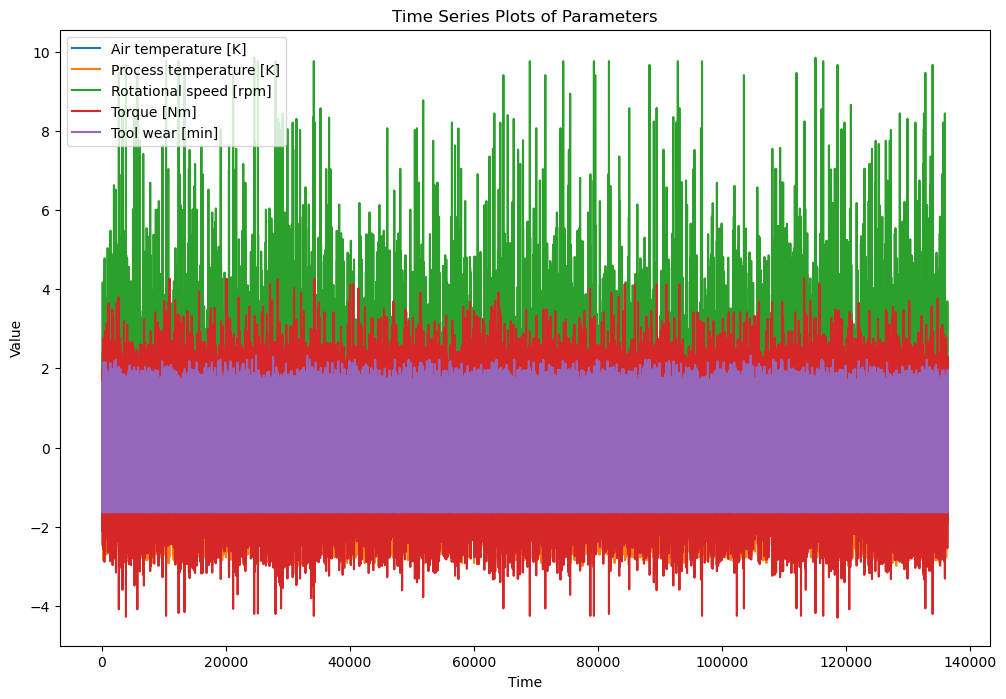

In [77]:
# Time Series Plots
time_series_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
plt.figure(figsize=(12, 8))
for col in time_series_cols:
    sns.lineplot(data=train_dataset[col], label=col)
plt.title('Time Series Plots of Parameters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

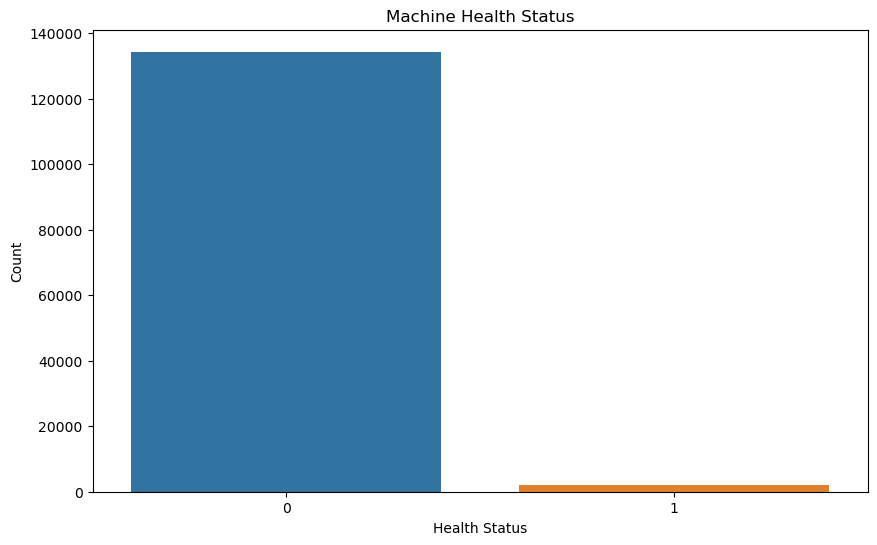

In [78]:
# Machine Health Status
plt.figure(figsize=(10, 6))
health_status = train_dataset['Machine failure'].value_counts()
sns.barplot(x=health_status.index, y=health_status.values)
plt.title('Machine Health Status')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()

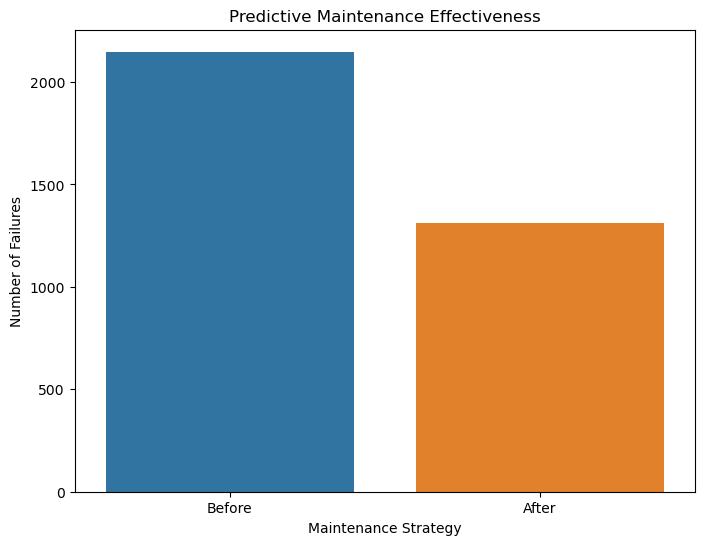

In [79]:
 #Predictive Maintenance Effectiveness
failure_counts_before = train_dataset[train_dataset['Machine failure'] == 1].shape[0]
failure_counts_after = test_dataset[test_dataset[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1) > 0].shape[0]

plt.figure(figsize=(8, 6))
sns.barplot(x=['Before', 'After'], y=[failure_counts_before, failure_counts_after])
plt.title('Predictive Maintenance Effectiveness')
plt.xlabel('Maintenance Strategy')
plt.ylabel('Number of Failures')
plt.show()

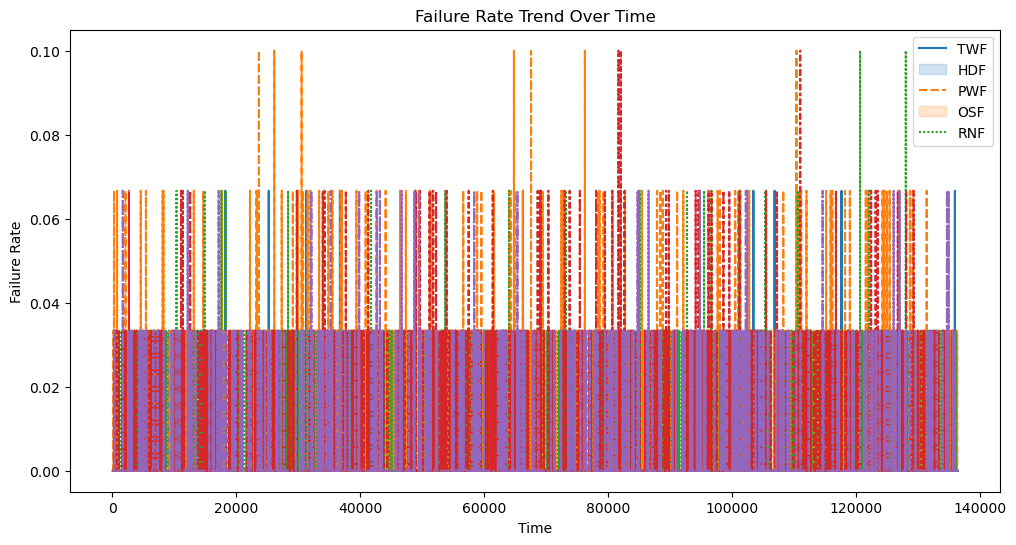

In [80]:
# Failure Rate Trend
failure_rate_trend = train_dataset[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].rolling(window=30).mean() # Smooth out the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=failure_rate_trend)
plt.title('Failure Rate Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Failure Rate')
plt.legend(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
plt.show()


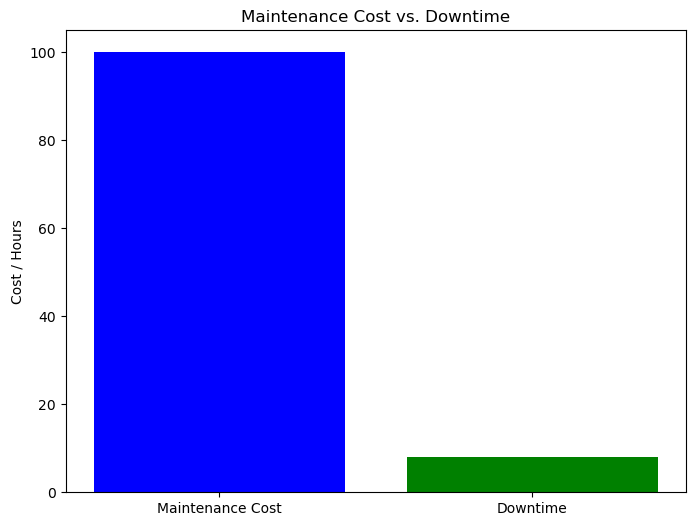

In [81]:
# Maintenance Cost vs. Downtime
maintenance_cost = 100  # Example maintenance cost in dollars
downtime_hours = 8  # Example downtime in hours
plt.figure(figsize=(8, 6))
plt.bar(['Maintenance Cost', 'Downtime'], [maintenance_cost, downtime_hours], color=['blue', 'green'])
plt.title('Maintenance Cost vs. Downtime')
plt.ylabel('Cost / Hours')
plt.show()

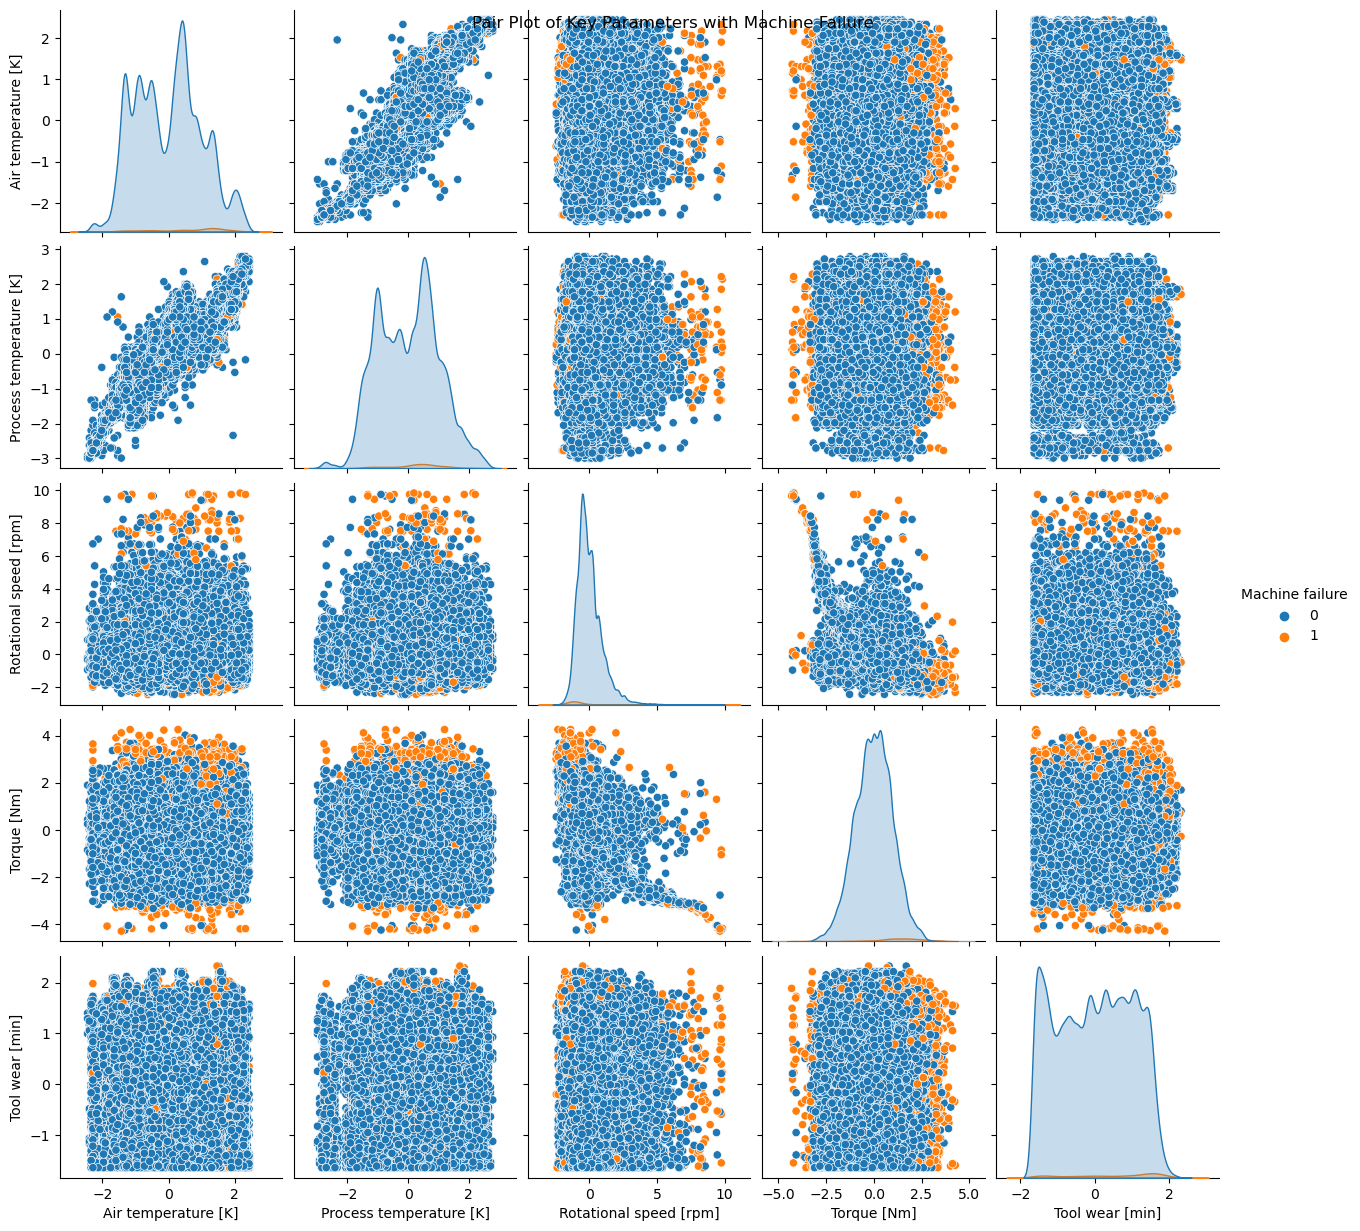

In [82]:
# Business-oriented Pair Plot
pairplot_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']
sns.pairplot(train_dataset[pairplot_cols], hue='Machine failure', diag_kind='kde')
plt.suptitle('Pair Plot of Key Parameters with Machine Failure')
plt.show()

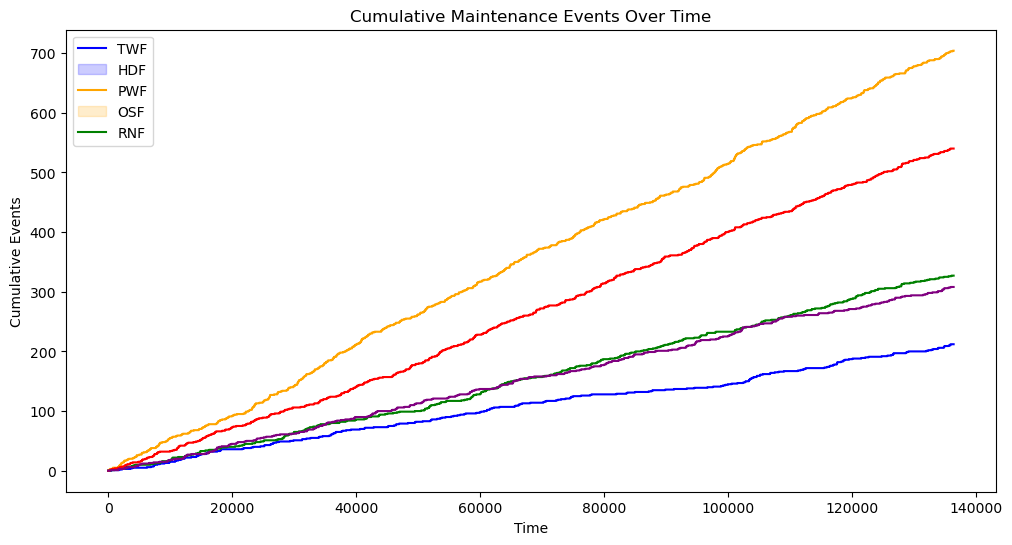

In [84]:
# Line Bar Plot for Maintenance Events Over Time
maintenance_events = train_dataset[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].cumsum()
maintenance_events['Time'] = train_dataset.index

plt.figure(figsize=(12, 6))
sns.lineplot(data=maintenance_events, x='Time', y='TWF', color='blue')
sns.lineplot(data=maintenance_events, x='Time', y='HDF', color='orange')
sns.lineplot(data=maintenance_events, x='Time', y='PWF', color='green')
sns.lineplot(data=maintenance_events, x='Time', y='OSF', color='red')
sns.lineplot(data=maintenance_events, x='Time', y='RNF', color='purple')
plt.title('Cumulative Maintenance Events Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Events')
plt.legend(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
plt.show()

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
model.score(X_train,y_train)

0.9845780589170924

In [90]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [95]:
# Initialize and train Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

In [98]:
random_forest_model.score(X_train,y_train)

0.9995675406255269

In [99]:
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
# Initialize and train Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)


SVC()

In [101]:
svm_model.score(X_train,y_train)

0.9854503074859451

In [103]:
svm_predictions = svm_model.predict(X_test)
svm_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
# Initialize and train Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [106]:
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
gradient_boosting_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)